In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [46]:
data = {
 'description': [
 "Comfortable cotton shirt", "Elegant silk dress",
 "Stylish leather jacket", "Warm woolen sweater",
 "Casual jeans", "Trendy sneakers",
 "Vintage denim jacket", "Elegant black dress",
 "Sporty running shoes", "Formal business suit"
 ],
 'rating': [4.5, 4.8, 4.7, 4.0, 3.8, 4.6, 4.5, 4.9, 4.7, 4.3]
 }

df=pd.DataFrame(data)
print(df)

                description  rating
0  Comfortable cotton shirt     4.5
1        Elegant silk dress     4.8
2    Stylish leather jacket     4.7
3       Warm woolen sweater     4.0
4              Casual jeans     3.8
5           Trendy sneakers     4.6
6      Vintage denim jacket     4.5
7       Elegant black dress     4.9
8      Sporty running shoes     4.7
9      Formal business suit     4.3


In [48]:
tfidf = TfidfVectorizer(stop_words="english", max_features=100)
X = tfidf.fit_transform(df["description"]).toarray()
y=df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
def plot(alpha, mse_ridge, mse_alpha):
    plt.plot(alpha, mse_ridge, label = "MSE Ridge", color="blue")
    plt.plot(alpha, mse_lasso, label = "MSE Lasso", color="red")
    plt.xlabel("Alpha")
    plt.ylabel("MSE")
    plt.title("Lasso vs Ridge mse comparison")
    plt.legend()
    plt.show()

In [52]:
ridge = Ridge()
ridge_params = { "alpha" : np.logspace(-4, 4, 10)}
ridge_grid = GridSearchCV(ridge, ridge_params, scoring="neg_mean_squared_error", cv=5)
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [54]:
lasso = Lasso()
lasso_params = {"alpha" : np.logspace(-4, 4, 10)}
lasso_grid = GridSearchCV(lasso, lasso_params, scoring="neg_mean_squared_error", cv=5)
lasso_grid.fit(X_train, y_train)

C:\Users\hrmoh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.109e-04, tolerance: 8.886e-05
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [56]:
best_alpha_ridge = ridge_grid.best_params_["alpha"]
best_alpha_lasso = lasso_grid.best_params_["alpha"]

In [58]:
best_ridge = Ridge(alpha = best_alpha_ridge)
best_ridge.fit(X_train, y_train)
best_lasso = Lasso(alpha = best_alpha_lasso)
best_lasso.fit(X_train, y_train)

C:\Users\hrmoh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.109e-04, tolerance: 8.886e-05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001)

In [60]:
ridge_best_pred = best_ridge.predict(X_test)
lasso_best_pred = best_lasso.predict(X_test)

mse_ridge = mean_squared_error(y_test, ridge_best_pred)
mse_lasso = mean_squared_error(y_test, lasso_best_pred)

print(f"Best Ridge Alpha: {best_alpha_ridge}, Ridge MSE: {mse_ridge}")
print(f"Best Lasso Alpha: {best_alpha_lasso}, Ridge MSE: {mse_lasso}")

Best Ridge Alpha: 0.0001, Ridge MSE: 0.057649074185566355
Best Lasso Alpha: 0.0001, Ridge MSE: 0.09523850962222329


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

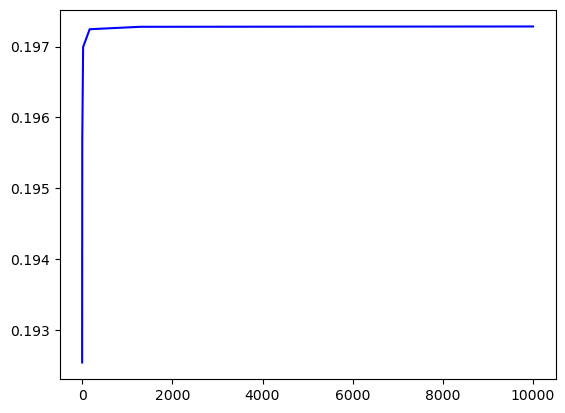

In [62]:
alphas= np.logspace(-4,4,10)
ridge_mse = -ridge_grid.cv_results_["mean_test_score"]
lasso_mse = -lasso_grid.cv_results_["mean_test_score"]
plot(alphas, ridge_mse, lasso_mse)

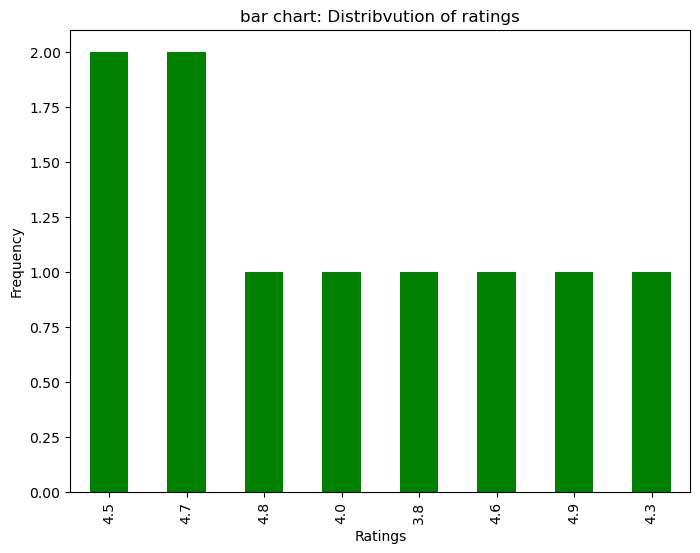

In [66]:
plt.figure(figsize=(8,6))
df["rating"].value_counts().plot(kind="bar", color="green")
plt.title("bar chart: Distribvution of ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

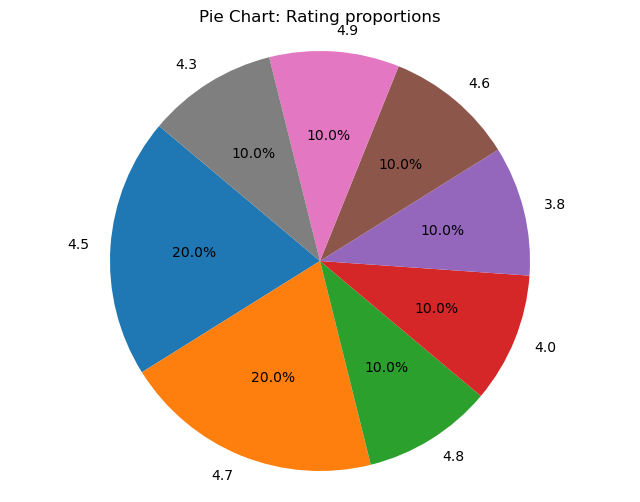

In [74]:
ratings_counts=df["rating"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(ratings_counts, labels=ratings_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Pie Chart: Rating proportions")
plt.axis("equal")
plt.show()

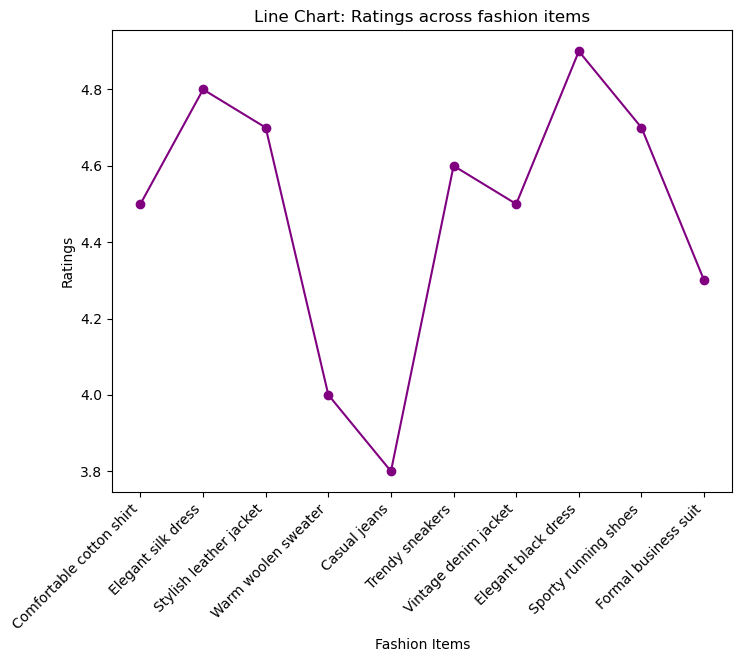

In [78]:
plt.figure(figsize=(8,6))
plt.plot(df["description"], df["rating"], marker="o", color = "purple")
plt.xticks(rotation=45, ha="right")
plt.title("Line Chart: Ratings across fashion items")
plt.xlabel("Fashion Items")
plt.ylabel("Ratings")
plt.show()